# <u> NACEP </u>
## 2015-16 CRDC
## AP v. DE Enrollment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
crdc_1516 = pd.read_csv('../filtered_data/04_filter_final.csv', dtype = {'LEAID':np.object})

In [3]:
len(crdc_1516.index)

18667

In [4]:
crdc_1516.columns.values

array(['COMBOKEY', 'SCH_NAME', 'GSHI', 'GSLO', 'JJ', 'LAT1516', 'LEAID',
       'LEA_NAME', 'LEA_STATE', 'LEA_STATE_NAME', 'LEVEL', 'LOCALE15',
       'LON1516', 'NMCNTY15', 'SCHID', 'SCH_APENR_AM_F', 'SCH_APENR_AM_M',
       'SCH_APENR_AS_F', 'SCH_APENR_AS_M', 'SCH_APENR_BL_F',
       'SCH_APENR_BL_M', 'SCH_APENR_HI_F', 'SCH_APENR_HI_M',
       'SCH_APENR_HP_F', 'SCH_APENR_HP_M', 'SCH_APENR_IDEA_F',
       'SCH_APENR_IDEA_M', 'SCH_APENR_IND', 'SCH_APENR_LEP_F',
       'SCH_APENR_LEP_M', 'SCH_APENR_TR_F', 'SCH_APENR_TR_M',
       'SCH_APENR_WH_F', 'SCH_APENR_WH_M', 'SCH_DUALENR_AM_F',
       'SCH_DUALENR_AM_M', 'SCH_DUALENR_AS_F', 'SCH_DUALENR_AS_M',
       'SCH_DUALENR_BL_F', 'SCH_DUALENR_BL_M', 'SCH_DUALENR_HI_F',
       'SCH_DUALENR_HI_M', 'SCH_DUALENR_HP_F', 'SCH_DUALENR_HP_M',
       'SCH_DUALENR_IDEA_F', 'SCH_DUALENR_IDEA_M', 'SCH_DUALENR_LEP_F',
       'SCH_DUALENR_LEP_M', 'SCH_DUALENR_TR_F', 'SCH_DUALENR_TR_M',
       'SCH_DUALENR_WH_F', 'SCH_DUALENR_WH_M', 'SCH_DUAL_IND',
    

# <font color = green> Clean Missing Values / Add Enrollment columns </font>
Cleaning Specificially those for int-columns -- these are recorded as negative numbers that interfere with the enrollment calculations.<br>

**This section sets up most of the calculations needed for the analyses in the report.**

In [5]:
crdc_1516_cleaned = crdc_1516.copy()

In [6]:
def missing_value_mapper(value):
    """Converts any negative number into 0, as these negative numbers represent missing/null values"""
    if isinstance(value, int):
        if value < 0:
            return 0
    return value

crdc_1516_cleaned = crdc_1516_cleaned.applymap(missing_value_mapper)

<font color = blue>** -- Totals Columns -- **</font>

** Total enrollments **

In [7]:
crdc_1516_cleaned['total_enrollment'] = crdc_1516_cleaned['TOT_ENR_M'] + crdc_1516_cleaned['TOT_ENR_F']

** Total white enrollments **

In [8]:
crdc_1516_cleaned['total_white_enrollment'] = crdc_1516_cleaned['SCH_ENR_WH_M'] + crdc_1516_cleaned['SCH_ENR_WH_F']

** Total non-white enrollments **

In [9]:
crdc_1516_cleaned['total_nonwhite_enrollment'] = crdc_1516_cleaned['total_enrollment'] - crdc_1516_cleaned['total_white_enrollment']

**Total Racial Breakdowns**

In [10]:
crdc_1516_cleaned['total_hi_enrollment'] = crdc_1516_cleaned['SCH_ENR_HI_M'] + crdc_1516_cleaned['SCH_ENR_HI_F']
crdc_1516_cleaned['total_am_enrollment'] = crdc_1516_cleaned['SCH_ENR_AM_M'] + crdc_1516_cleaned['SCH_ENR_AM_F']
crdc_1516_cleaned['total_as_enrollment'] = crdc_1516_cleaned['SCH_ENR_AS_M'] + crdc_1516_cleaned['SCH_ENR_AS_F']
crdc_1516_cleaned['total_bl_enrollment'] = crdc_1516_cleaned['SCH_ENR_BL_M'] + crdc_1516_cleaned['SCH_ENR_BL_F']
crdc_1516_cleaned['total_hp_enrollment'] = crdc_1516_cleaned['SCH_ENR_HP_M'] + crdc_1516_cleaned['SCH_ENR_HP_F']
crdc_1516_cleaned['total_tr_enrollment'] = crdc_1516_cleaned['SCH_ENR_TR_M'] + crdc_1516_cleaned['SCH_ENR_TR_F']

** Total LEP enrollment **

In [11]:
crdc_1516_cleaned['total_lep_enrollment'] = crdc_1516_cleaned['SCH_ENR_LEP_M'] + crdc_1516_cleaned['SCH_ENR_LEP_F']

** Total IDEA enrollment **

In [12]:
crdc_1516_cleaned['total_idea_enrollment'] = crdc_1516_cleaned['SCH_ENR_IDEA_M'] + crdc_1516_cleaned['SCH_ENR_IDEA_F']

<font color = blue>** -- DE Columns -- **</font>

** Total DE Enrollment **

In [13]:
crdc_1516_cleaned['de_total_enrollment'] = crdc_1516_cleaned['TOT_DUALENR_M'] + crdc_1516_cleaned['TOT_DUALENR_F']

** Total DE white enrollment **

In [14]:
crdc_1516_cleaned['de_white_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_WH_F'] +  crdc_1516_cleaned['SCH_DUALENR_WH_M']

** Total DE non-white enrollment **

In [15]:
crdc_1516_cleaned['de_nonwhite_enrollment'] = crdc_1516_cleaned['de_total_enrollment'] - crdc_1516_cleaned['de_white_enrollment']

** DE Racial Breakdowns **

In [16]:
crdc_1516_cleaned['de_hi_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HI_M'] + crdc_1516_cleaned['SCH_DUALENR_HI_F']
crdc_1516_cleaned['de_am_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AM_M'] + crdc_1516_cleaned['SCH_DUALENR_AM_F']
crdc_1516_cleaned['de_as_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_AS_M'] + crdc_1516_cleaned['SCH_DUALENR_AS_F']
crdc_1516_cleaned['de_bl_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_BL_M'] + crdc_1516_cleaned['SCH_DUALENR_BL_F']
crdc_1516_cleaned['de_hp_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_HP_M'] + crdc_1516_cleaned['SCH_DUALENR_HP_F']
crdc_1516_cleaned['de_tr_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_TR_M'] + crdc_1516_cleaned['SCH_DUALENR_TR_F']

** Total DE LEA-enrollment **

In [17]:
crdc_1516_cleaned['de_lep_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_LEP_M'] + crdc_1516_cleaned['SCH_DUALENR_LEP_F']

** Total DE IDEA-enrollment **

In [18]:
crdc_1516_cleaned['de_idea_enrollment'] = crdc_1516_cleaned['SCH_DUALENR_IDEA_M'] + crdc_1516_cleaned['SCH_DUALENR_IDEA_F']

<font color = blue>** -- AP Columns -- **</font>

** Total AP enrollment **

In [19]:
crdc_1516_cleaned['ap_total_enrollment'] = crdc_1516_cleaned['TOT_APENR_M'] + crdc_1516_cleaned['TOT_APENR_F']

**Total AP white enrollment**

In [20]:
crdc_1516_cleaned['ap_white_enrollment'] = crdc_1516_cleaned['SCH_APENR_WH_F'] +  crdc_1516_cleaned['SCH_APENR_WH_M']

**Total AP non-white enrollment**

In [21]:
crdc_1516_cleaned['ap_nonwhite_enrollment'] = crdc_1516_cleaned['ap_total_enrollment'] - crdc_1516_cleaned['ap_white_enrollment']

**AP Racial Breakdowns**

In [22]:
crdc_1516_cleaned['ap_hi_enrollment'] = crdc_1516_cleaned['SCH_APENR_HI_M'] + crdc_1516_cleaned['SCH_APENR_HI_F']
crdc_1516_cleaned['ap_am_enrollment'] = crdc_1516_cleaned['SCH_APENR_AM_M'] + crdc_1516_cleaned['SCH_APENR_AM_F']
crdc_1516_cleaned['ap_as_enrollment'] = crdc_1516_cleaned['SCH_APENR_AS_M'] + crdc_1516_cleaned['SCH_APENR_AS_F']
crdc_1516_cleaned['ap_bl_enrollment'] = crdc_1516_cleaned['SCH_APENR_BL_M'] + crdc_1516_cleaned['SCH_APENR_BL_F']
crdc_1516_cleaned['ap_hp_enrollment'] = crdc_1516_cleaned['SCH_APENR_HP_M'] + crdc_1516_cleaned['SCH_APENR_HP_F']
crdc_1516_cleaned['ap_tr_enrollment'] = crdc_1516_cleaned['SCH_APENR_TR_M'] + crdc_1516_cleaned['SCH_APENR_TR_F']

**Total AP LEA-enrollment**

In [23]:
crdc_1516_cleaned['ap_lep_enrollment'] = crdc_1516_cleaned['SCH_APENR_LEP_M'] + crdc_1516_cleaned['SCH_APENR_LEP_F']

**Total AP IDEA-enrollment**

In [24]:
crdc_1516_cleaned['ap_idea_enrollment'] = crdc_1516_cleaned['SCH_APENR_IDEA_M'] + crdc_1516_cleaned['SCH_APENR_IDEA_F']

# <font color = green> Manipulate DataFrame </font>

**Add High School Enrollments using the Averager Function**

In [25]:
def hs_enrollment_averager(df):
    """Provides a work-around for figuring out the number of high school students in a school that offers grades 8th 
        or lower.  Scales the total enrollment of each school by the ratio of high school grades offered : total grades
        offered
        
        Takes in a DataFrame and returns a list of 'averaged' enrollments for each school."""
    hs_enrollment_list = []
    for index, row in df.iterrows():
        all_count = 0
        hs_count = 0
        if row.SCH_GRADE_G12 == 'Yes':
            hs_count += 1
            all_count += 1
        if row.SCH_GRADE_G11 == 'Yes':
            hs_count += 1
            all_count += 1
        if row.SCH_GRADE_G10 == 'Yes':
            hs_count += 1
            all_count += 1
        if row.SCH_GRADE_G09 == 'Yes':
            hs_count += 1
            all_count += 1
            
        if row.SCH_GRADE_G08 == 'Yes':
            all_count += 1
        if row.SCH_GRADE_G07 == 'Yes':
            all_count += 1
        if row.SCH_GRADE_G06 == 'Yes':
            all_count += 1
        if row.SCH_GRADE_G05 == 'Yes':
            all_count += 1
        if row.SCH_GRADE_G04 == 'Yes':
            all_count += 1
        if row.SCH_GRADE_G03 == 'Yes':
            all_count += 1
        if row.SCH_GRADE_G02 == 'Yes':
            all_count += 1
        if row.SCH_GRADE_G01 == 'Yes':
            all_count += 1
        if row.SCH_GRADE_KG == 'Yes':
            all_count += 1
        if row.SCH_GRADE_PS == 'Yes':
            all_count += 1
        
        if all_count > 0:
            hs_ratio = hs_count / all_count
            hs_enrollment = int(round(row['total_enrollment'] * hs_ratio, 0))
        else:
            hs_enrollment = row['total_enrollment']
        
        hs_enrollment_list.append(hs_enrollment)
    return hs_enrollment_list

In [26]:
"""gender/race HS-Averages"""
crdc_1516_cleaned['hs_total_enrollment'] = hs_enrollment_averager(crdc_1516_cleaned) 

In [27]:
crdc_1516_cleaned['hs_male'] = round((crdc_1516_cleaned['TOT_ENR_M'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_female'] = round((crdc_1516_cleaned['TOT_ENR_F'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_white'] = round((crdc_1516_cleaned['total_white_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_nonwhite'] = round((crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_hi'] = round((crdc_1516_cleaned['total_hi_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_am'] = round((crdc_1516_cleaned['total_am_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_as'] = round((crdc_1516_cleaned['total_as_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_bl'] = round((crdc_1516_cleaned['total_bl_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_hp'] = round((crdc_1516_cleaned['total_hp_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_tr'] = round((crdc_1516_cleaned['total_tr_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

crdc_1516_cleaned['hs_idea'] = round((crdc_1516_cleaned['total_idea_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)
crdc_1516_cleaned['hs_lep'] = round((crdc_1516_cleaned['total_lep_enrollment'] / crdc_1516_cleaned['total_enrollment']) * crdc_1516_cleaned['hs_total_enrollment'],0)

In [28]:
with pd.option_context('display.max_columns', 150):
    display(crdc_1516_cleaned[(crdc_1516_cleaned.SCH_DUAL_IND == 'Yes')])

,COMBOKEY,SCH_NAME,GSHI,GSLO,JJ,LAT1516,LEAID,LEA_NAME,LEA_STATE,LEA_STATE_NAME,LEVEL,LOCALE15,LON1516,NMCNTY15,SCHID,SCH_APENR_AM_F,SCH_APENR_AM_M,SCH_APENR_AS_F,SCH_APENR_AS_M,SCH_APENR_BL_F,SCH_APENR_BL_M,SCH_APENR_HI_F,SCH_APENR_HI_M,SCH_APENR_HP_F,SCH_APENR_HP_M,SCH_APENR_IDEA_F,SCH_APENR_IDEA_M,SCH_APENR_IND,SCH_APENR_LEP_F,SCH_APENR_LEP_M,SCH_APENR_TR_F,SCH_APENR_TR_M,SCH_APENR_WH_F,SCH_APENR_WH_M,SCH_DUALENR_AM_F,SCH_DUALENR_AM_M,SCH_DUALENR_AS_F,SCH_DUALENR_AS_M,SCH_DUALENR_BL_F,SCH_DUALENR_BL_M,SCH_DUALENR_HI_F,SCH_DUALENR_HI_M,SCH_DUALENR_HP_F,SCH_DUALENR_HP_M,SCH_DUALENR_IDEA_F,SCH_DUALENR_IDEA_M,SCH_DUALENR_LEP_F,SCH_DUALENR_LEP_M,SCH_DUALENR_TR_F,SCH_DUALENR_TR_M,SCH_DUALENR_WH_F,SCH_DUALENR_WH_M,SCH_DUAL_IND,SCH_ENR_AM_F,SCH_ENR_AM_M,SCH_ENR_AS_F,SCH_ENR_AS_M,SCH_ENR_BL_F,SCH_ENR_BL_M,SCH_ENR_HI_F,SCH_ENR_HI_M,SCH_ENR_HP_F,SCH_ENR_HP_M,SCH_ENR_IDEA_F,SCH_ENR_IDEA_M,SCH_ENR_LEP_F,SCH_ENR_LEP_M,SCH_ENR_TR_F,SCH_ENR_TR_M,SCH_ENR_WH_F,SCH_ENR_WH_M,SCH_GRADE_G01,SCH_GRADE_G02,SCH_GRADE_G03,SCH_GRADE_G04,...,SCH_IBENR_HP_M,SCH_IBENR_IDEA_F,SCH_IBENR_IDEA_M,SCH_IBENR_IND,SCH_IBENR_LEP_F,SCH_IBENR_LEP_M,SCH_IBENR_TR_F,SCH_IBENR_TR_M,SCH_IBENR_WH_F,SCH_IBENR_WH_M,SCH_STATUS_ALT,SCH_STATUS_CHARTER,SCH_STATUS_MAGNET,SCH_STATUS_SPED,SCH_TYPE,SCH_TYPE_TEXT,SCH_UGDETAIL_HS,STABR,Students_in_11_12,TITLEI,TOT_APENR_F,TOT_APENR_M,TOT_DUALENR_F,TOT_DUALENR_M,TOT_ENR_F,TOT_ENR_M,TOT_IBENR_F,TOT_IBENR_M,VIRTUAL,total_enrollment,total_white_enrollment,total_nonwhite_enrollment,total_hi_enrollment,total_am_enrollment,total_as_enrollment,total_bl_enrollment,total_hp_enrollment,total_tr_enrollment,total_lep_enrollment,total_idea_enrollment,de_total_enrollment,de_white_enrollment,de_nonwhite_enrollment,de_hi_enrollment,de_am_enrollment,de_as_enrollment,de_bl_enrollment,de_hp_enrollment,de_tr_enrollment,de_lep_enrollment,de_idea_enrollment,ap_total_enrollment,ap_white_enrollment,ap_nonwhite_enrollment,ap_hi_enrollment,ap_am_enrollment,ap_as_enrollment,ap_bl_enrollment,ap_hp_enrollment,ap_tr_enrollment,ap_lep_enrollment,ap_idea_enrollment,hs_total_enrollment,hs_male,hs_female,hs_white,hs_nonwhite,hs_hi,hs_am,hs_as,hs_bl,hs_hp,hs_tr,hs_idea,hs_lep
0,='010000500871',Albertville High Sch,12,9,No,34.262154,100005,Albertville City,AL,ALABAMA,3,32,-86.204863,Marshall County,871,0,0,0,2,0,2,20,20,0,0,0,0,Yes,17,20,2,2,95,44,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,17,5,Yes,2,2,2,5,20,20,221,260,2,0,28,43,38,62,5,8,398,350,No,No,No,No,...,0,0,0,No,0,0,0,0,0,0,No,No,No,No,1.0,Regular School,-9,AL,Yes,-9,117,70,19,5,650,645,0,0,No,1295,748,547,481,4,7,40,2,13,100,71,24,22,2,2,0,0,0,0,0,0,0,187,139,48,40,0,2,2,0,4,37,0,1295,645.0,650.0,748.0,547.0,481.0,4.0,7.0,40.0,2.0,13.0,71.0,100.0
1,='010000600872',Asbury Sch,12,6,No,34.362770,100006,Marshall County,AL,ALABAMA,4,42,-86.142240,Marshall County,872,0,0,0,0,0,0,0,2,0,0,0,0,Yes,0,0,0,0,50,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,Yes,0,2,2,2,2,0,95,92,0,0,13,49,17,20,2,2,149,191,No,No,No,No,...,0,0,0,No,0,0,0,0,0,0,No,No,No,No,1.0,Regular School,-9,AL,Yes,-9,50,31,8,0,250,289,0,0,No,539,340,199,187,2,4,2,0,4,37,62,8,8,0,0,0,0,0,0,0,0,0,81,79,2,2,0,0,0,0,0,0,0,308,165.0,143.0,194.0,114.0,107.0,1.0,2.0,1.0,0.0,2.0,35.0,21.0
2,='010000600878',Douglas High Sch,12,9,No,34.178157,100006,Marshall County,AL,ALABAMA,3,42,-86.319947,Marshall County,878,2,0,0,0,2,0,0,0,0,0,0,0,Yes,0,0,0,0,110,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,11,Yes,2,2,0,2,5,5,65,77,0,0,16,28,5,17,0,0,212,224,No,No,No,No,...,0,0,0,No,0,0,0,0,0,0,No,No,No,No,1.0,Regular School,-9,AL,Yes,-9,114,59,14,11,284,310,0,0,No,594,436,158,142,4,2,10,0,0,22,44,25,25,0,0,0,0,0,0,0,0,0,173,169,4,0,2,0,2,0,0,0,0,594,310.0,284.0,436.0,158.0,142.0,4.0,2.0,10.0,0.0,0.0,44.0,22.0
3,='010000600883',Kate D Smith DAR High Sch,12,9,No,34.533721,100006,Marshall County,AL,ALABAMA,3,42,-86.253681,Marshall County,883,0,0,0,0,0,0,0,0,0,0,0,0,Yes,0,0,0,0,113,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,11,Yes,0,0,2,0,2,2,2,2,2,0,10,16,2,0,0,2,215,230,No,No,No,No,...,0,0,0,No,0,0,0,0,0,

** Add Size Column **

In [29]:
def school_sizer(enroll):
    if enroll < 100:
        return 1
    elif 100 <= enroll < 500:
        return 2
    elif 500 <= enroll < 1200:
        return 3
    return 4

In [30]:
crdc_1516_cleaned['size_group'] = crdc_1516_cleaned['total_enrollment'].apply(lambda x: school_sizer(x))

** Add Region Column **

In [31]:
"""
1:  Middle States Commission on Higher Education - New York, New Jersey, Pennsylvania, Delaware, Maryland, the District of Columbia

2:  New England Association of Schools and Colleges - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

3:  Higher Learning Commission - Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan, Minnesota, Missouri, 
    North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, West Virginia, and Wyoming

4:  Northwest Commission on Colleges and Universities - Alaska, Idaho, Montana, Nevada, Oregon, Utah, and Washington

5:  Southern Association of Colleges and Schools - Alabama, Florida, Georgia, Kentucky, Louisiana, Mississippi, 
    North Carolina, South Carolina, Tennessee, Texas and Virginia

6:  Western Association of Schools and Colleges - California, Hawaii
"""

middle_states = "NY,NJ,PA,DE,MD,DC".split(',')
new_england = "CT,ME,MA,NH,RI,VT".split(',')
higher_learning_commission = "AR,AZ,CO,IA,IL,IN,KS,MI,MN,MO,ND,NE,NM,OH,OK,SD,WI,WV,WY".split(',')
northwest_commission = "AK,ID,MT,NV,OR,UT,WA".split(',')
southern_association = "AL,FL,GA,KY,LA,MS,NC,SC,TN,TX,VA".split(',')
western_association = "CA,HI".split(',')

In [32]:
def region_mapper(state):
    if state in middle_states:
        return "MSCHE"
    elif state in new_england:
        return "NEASC"
    elif state in higher_learning_commission:
        return "HLC"
    elif state in northwest_commission:
        return "NWCCU"
    elif state in southern_association:
        return "SACS"
    elif state in western_association:
        return "WASC"
    else:
        return "Messed Up"
    
crdc_1516_cleaned['region_accred'] = crdc_1516_cleaned['LEA_STATE'].apply(lambda x: region_mapper(x))

** Add Ethnicity Percentage **

In [33]:
crdc_1516_cleaned['pct_eth'] = crdc_1516_cleaned['total_nonwhite_enrollment'] / crdc_1516_cleaned['total_enrollment']

Text(0.5,0,'Ethnicity Percentage')

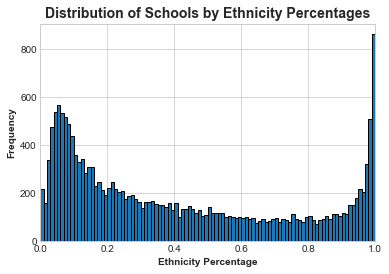

In [34]:
crdc_1516_cleaned.pct_eth.plot.hist(bins=100, xlim = [0,1], edgecolor = 'k')
plt.title('Distribution of Schools by Ethnicity Percentages')
plt.xlabel('Ethnicity Percentage')

** Add Ethnicity Percentage Quintile **

In [35]:
def eth_grouper(pct):
    if pct <= .20:
        return 1
    elif .20 < pct <= .4:
        return 2
    elif .4 < pct <= 0.6:
        return 3
    elif .6 < pct <= .8:
        return 4
    return 5
    
crdc_1516_cleaned['eth_quintile'] = crdc_1516_cleaned['pct_eth'].apply(lambda pct: eth_grouper(pct))

# <font color = green> Filter non-Yes Schools and Examine Characteristics </font>

In [36]:
def school_grade_range(df):
    """Calculates the number of schools in a given DataFrame (df) of a particular distribution of grades:
        Example:  If a school (in df) offers grades 9,10,11,12 exclusively, they are placed in the '9-12' 
                    category. """
    df_grade_range = []
    for index, row in df.iterrows():
        grade_range = []

        if row.SCH_GRADE_G12 == 'Yes':
            grade_range.append(12)
        if row.SCH_GRADE_G11 == 'Yes':
            grade_range.append(11)
        if row.SCH_GRADE_G10 == 'Yes':
            grade_range.append(10)
        if row.SCH_GRADE_G09 == 'Yes':
            grade_range.append(9)
        if row.SCH_GRADE_G08 == 'Yes':
            grade_range.append(8)
        if row.SCH_GRADE_G07 == 'Yes':
            grade_range.append(7)
        if row.SCH_GRADE_G06 == 'Yes':
            grade_range.append(6)
        if row.SCH_GRADE_G05 == 'Yes':
            grade_range.append(5)
        if row.SCH_GRADE_G04 == 'Yes':
            grade_range.append(4)
        if row.SCH_GRADE_G03 == 'Yes':
            grade_range.append(3)
        if row.SCH_GRADE_G02 == 'Yes':
            grade_range.append(2)
        if row.SCH_GRADE_G01 == 'Yes':
            grade_range.append(1)
        if row.SCH_GRADE_KG == 'Yes':
            grade_range.append('kg')
        if row.SCH_GRADE_PS == 'Yes':
            grade_range.append('pk')
        
        if grade_range == [12,11,10,9,8,7,6,5,4,3,2,1,'kg','pk']:
            df_grade_range.append('pk-12')
        elif grade_range == [12,11,10,9,8,7,6,5,4,3,2,1,'kg']:
            df_grade_range.append('kg-12')
        elif grade_range == [12,11,10,9,8,7,6,5]:
            df_grade_range.append('05-12')
        elif grade_range == [12,11,10,9,8,7,6]:
            df_grade_range.append('06-12')
        elif grade_range == [12,11,10,9,8,7]:
            df_grade_range.append('07-12')
        elif grade_range == [12,11,10,9,8]:
            df_grade_range.append('08-12')
        elif grade_range == [12,11,10,9]:
            df_grade_range.append('09-12')
        elif grade_range == [11,10,9]:
            df_grade_range.append('09-11')
        elif grade_range == [10,9]:
            df_grade_range.append('09-10')
        elif grade_range == [12,11,10]:
            df_grade_range.append('10-12')
        elif grade_range == [12,11]:
            df_grade_range.append('11-12')
        elif grade_range == [9]:
            df_grade_range.append('9-only')
        elif grade_range == [10]:
            df_grade_range.append('10-only')
        elif grade_range == [11]:
            df_grade_range.append('11-only')
        elif grade_range == [12]:
            df_grade_range.append('12-only')
        else:
            df_grade_range.append('other')
    return pd.DataFrame(df_grade_range, columns=['grade_range'])

In [37]:
def have_gr9_or_younger(df):
    """Calculates the number of schools in a given DataFrame (df) offer grades of 8th or younger (i.e. non-high school grades)"""
    count = 0
    for index, row in df.iterrows():
        if row.SCH_GRADE_G08 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G07 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G06 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G05 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G04 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G03 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G02 == 'Yes':
            count += 1
        elif row.SCH_GRADE_G01 == 'Yes':
            count += 1
        elif row.SCH_GRADE_KG == 'Yes':
            count += 1
        elif row.SCH_GRADE_PS == 'Yes':
            count += 1
    return round(count / len(df),3)

**DE**

In [38]:
crdc_1516_deYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_DUAL_IND == 'Yes']

In [39]:
"""Number of schools which responded 'Yes' to the DE_Flag """
len(crdc_1516_deYes)

13330

In [40]:
"""Grade Ranges for Schools with DE Students"""
deYes_grade_range_list = school_grade_range(crdc_1516_deYes).join(crdc_1516_deYes[['total_enrollment', 'de_total_enrollment']].reset_index(drop = True), how = 'outer')

deYes_grade_range_dist = deYes_grade_range_list['grade_range'].value_counts().reset_index().sort_values('index').set_index('index')
deYes_grade_range_dist['pct_of_schools'] = round(deYes_grade_range_dist['grade_range'] / len(deYes_grade_range_list), 3)

deYes_grade_range_enrollments = pd.DataFrame(deYes_grade_range_list.groupby('grade_range')['total_enrollment'].sum())
deYes_grade_range_enrollments['pct_of_total_enrollment'] = round(deYes_grade_range_enrollments['total_enrollment'] / crdc_1516_deYes['total_enrollment'].sum(), 3)

deYes_grade_range_de_enrollments = pd.DataFrame(deYes_grade_range_list.groupby('grade_range')['de_total_enrollment'].sum())
deYes_grade_range_de_enrollments['pct_of_total_de_enrollment'] = round(deYes_grade_range_de_enrollments['de_total_enrollment'] / crdc_1516_deYes['de_total_enrollment'].sum(), 3)

deYes_grade_range_dist.join(deYes_grade_range_enrollments).join(deYes_grade_range_de_enrollments).rename({'grade_range': '# schools'}, axis = 1)

,# schools,pct_of_schools,total_enrollment,pct_of_total_enrollment,de_total_enrollment,pct_of_total_de_enrollment
index,,,,,,
05-12,28,0.002,15233,0.001,1261,0.001
06-12,607,0.046,296372,0.026,24309,0.021
07-12,1659,0.124,574941,0.051,58581,0.051
08-12,195,0.015,156724,0.014,16287,0.014
09-11,28,0.002,11536,0.001,1425,0.001
09-12,9481,0.711,9296851,0.824,953130,0.828
10-12,232,0.017,263635,0.023,50881,0.044
11-12,79,0.006,31357,0.003,9095,0.008
11-only,1,0.000,32,0.000,32,0.000


In [41]:
"""What portion of schools that offer DE have grades of 8th or younger?  This is important when considering
    total enrollment of these schools, as only students in grades 9+ will be taking DE or AP Classes"""
have_gr9_or_younger(crdc_1516_deYes)

0.263

In [42]:
de_total_enrollment = crdc_1516_deYes['de_total_enrollment'].sum()
display(de_total_enrollment)
crdc_1516_cleaned['de_total_enrollment'].sum()

1151670

1151670

** AP **

In [43]:
crdc_1516_apYes = crdc_1516_cleaned[crdc_1516_cleaned.SCH_APENR_IND == 'Yes']

In [44]:
"""Number of schools which responded 'Yes' to the AP_Flag """
len(crdc_1516_apYes)

12756

In [45]:
"""Grade Ranges for Schools with AP Students"""
apYes_grade_range_list = school_grade_range(crdc_1516_apYes).join(crdc_1516_apYes[['total_enrollment', 'ap_total_enrollment']].reset_index(drop = True), how = 'outer')

apYes_grade_range_dist = apYes_grade_range_list['grade_range'].value_counts().reset_index().sort_values('index').set_index('index')
apYes_grade_range_dist['pct_of_schools'] = round(apYes_grade_range_dist['grade_range'] / len(apYes_grade_range_list), 3)

apYes_grade_range_enrollments = pd.DataFrame(apYes_grade_range_list.groupby('grade_range')['total_enrollment'].sum())
apYes_grade_range_enrollments['pct_of_total_enrollment'] = round(apYes_grade_range_enrollments['total_enrollment'] / crdc_1516_apYes['total_enrollment'].sum(), 3)

apYes_grade_range_ap_enrollments = pd.DataFrame(apYes_grade_range_list.groupby('grade_range')['ap_total_enrollment'].sum())
apYes_grade_range_ap_enrollments['pct_of_total_ap_enrollment'] = round(apYes_grade_range_ap_enrollments['ap_total_enrollment'] / crdc_1516_apYes['ap_total_enrollment'].sum(), 3)

apYes_grade_range_dist.join(apYes_grade_range_enrollments).join(apYes_grade_range_ap_enrollments).rename({'grade_range': '# schools'}, axis = 1)

,# schools,pct_of_schools,total_enrollment,pct_of_total_enrollment,ap_total_enrollment,pct_of_total_ap_enrollment
index,,,,,,
05-12,41,0.003,28091,0.002,4272,0.002
06-12,543,0.043,335531,0.025,48501,0.018
07-12,978,0.077,509683,0.038,67422,0.024
08-12,198,0.016,190004,0.014,29903,0.011
09-11,40,0.003,17514,0.001,4402,0.002
09-12,10088,0.791,11373896,0.851,2451047,0.888
10-12,230,0.018,297603,0.022,78824,0.029
11-12,33,0.003,17628,0.001,7692,0.003
12-only,1,0.000,391,0.000,36,0.000


In [46]:
"""What portion of schools that offer AP have grades of 8th or younger?  This is important when considering
    total enrollment of these schools, as only students in grades 9+ will be taking DE or AP Classes"""
have_gr9_or_younger(crdc_1516_apYes)

0.185

In [47]:
ap_total_enrollment = crdc_1516_apYes['ap_total_enrollment'].sum()
display(ap_total_enrollment)
crdc_1516_cleaned['ap_total_enrollment'].sum()

2758807

2758807

# <font color = green> Analysis </font>

# I. Overall 

** Total Enrollment in all schools **

In [118]:
total_enrollment = crdc_1516_cleaned['total_enrollment'].sum()
format(crdc_1516_cleaned['total_enrollment'].sum(), ',d') + ' total students in the dataset.'

'15,127,325 total students in the dataset.'

In [119]:
"Total High School Enrollment BASED ON AVERAGING THE CRDC GRADE COLUMNS AGAINST ACTUAL TOTAL ENROLLMENT"
hs_total_enrollment = crdc_1516_cleaned['hs_total_enrollment'].sum()
format(sum(crdc_1516_cleaned['hs_total_enrollment']), ',d') + ' total high school students in all schools by averaging Total Enrollments'

'14,070,009 total high school students in all schools by averaging Total Enrollments'

**Total Enrollment in DE-offering schools**

In [50]:
deOffering_total_enrollment = crdc_1516_deYes['total_enrollment'].sum()
format(deOffering_total_enrollment, ',d') + ' total students in schools offering DE'

'11,283,303 total students in schools offering DE'

In [51]:
"Total High School Enrollment BASED ON AVERAGING THE CRDC GRADE COLUMNS AGAINST ACTUAL TOTAL ENROLLMENT"
format(sum(crdc_1516_deYes['hs_total_enrollment']), ',d') + ' total students in schools offering DE by averaging Total Enrollments'

'10,581,037 total students in schools offering DE by averaging Total Enrollments'

**Total Enrollment in AP-offering schools**

In [52]:
apOffering_total_enrollment = crdc_1516_apYes['total_enrollment'].sum()
format(apOffering_total_enrollment, ',d') + ' total students in schools offering AP'

'13,360,421 total students in schools offering AP'

In [53]:
"Total High School Enrollment BASED ON AVERAGING THE CRDC GRADE COLUMNS AGAINST ACTUAL TOTAL ENROLLMENT"
format(sum(crdc_1516_apYes['hs_total_enrollment']), ',d') + ' total students in schools offering AP by averaging Total Enrollments'

'12,694,370 total students in schools offering AP by averaging Total Enrollments'

## <div class = 'alert alert-cell alert-info'>Denominator DE/AP Yes Schools</div>

## II. By Gender

** DE-enrolled **

In [54]:
total_dualEnr_m = crdc_1516_deYes['TOT_DUALENR_M'].sum()
total_dualEnr_f = crdc_1516_deYes['TOT_DUALENR_F'].sum()
de_pct_m = round(total_dualEnr_m / (de_total_enrollment) * 100, 1)
de_pct_f = round(total_dualEnr_f / (de_total_enrollment) * 100, 1)

** AP-enrolled **

In [55]:
total_apEnr_m = crdc_1516_apYes['TOT_APENR_M'].sum()
total_apEnr_f = crdc_1516_apYes['TOT_APENR_F'].sum()
ap_pct_m = round(total_apEnr_m / (ap_total_enrollment) * 100, 1)
ap_pct_f = round(total_apEnr_f / (ap_total_enrollment) * 100, 1)

**Totals in DE-Offering Schools**

In [56]:
total_enr_deOffering_m = crdc_1516_deYes['TOT_ENR_M'].sum()
total_enr_deOffering_f = crdc_1516_deYes['TOT_ENR_F'].sum()
deOffering_pct_m = round(total_enr_deOffering_m / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_f = round(total_enr_deOffering_f / (deOffering_total_enrollment) * 100, 1)

**Totals in AP-Offering Schools**

In [57]:
total_enr_apOffering_m = crdc_1516_apYes['TOT_ENR_M'].sum()
total_enr_apOffering_f = crdc_1516_apYes['TOT_ENR_F'].sum()
apOffering_pct_m = round(total_enr_apOffering_m / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_f = round(total_enr_apOffering_f / (apOffering_total_enrollment) * 100, 1)

**Visualizing the differences**

In [58]:
de_gender_stats = pd.DataFrame({'Out of All Students in DE-Yes': [deOffering_pct_m, deOffering_pct_f],
                                'Out of DE-Students': [de_pct_m, de_pct_f]}, 
                                index = ['Male', 'Female'])

In [59]:
ap_gender_stats = pd.DataFrame({'Out of All Students in AP-Yes': [apOffering_pct_m, apOffering_pct_f],
                                'Out of AP-Students': [ap_pct_m, ap_pct_f]}, 
                                index = ['Male', 'Female'])

In [60]:
gender_order = ['Out of All Students in DE-Yes','Out of DE-Students','Out of All Students in AP-Yes', 'Out of AP-Students']
display(pd.concat([de_gender_stats, ap_gender_stats], axis = 1)[gender_order])
print('Reads like:  Males make up ' + str(deOffering_pct_m) + '% of All students (in schools that offer DE), and',
         str(de_pct_m) + '% of students enrolled in DE courses.')
print('And: Males make up ' + str(apOffering_pct_m) + '% of All students (in schools that offer AP), and',
         str(ap_pct_m) + '% of students enrolled in AP courses.')

,Out of All Students in DE-Yes,Out of DE-Students,Out of All Students in AP-Yes,Out of AP-Students
Male,51.0,45.5,50.9,43.8
Female,49.0,54.5,49.1,56.2


Reads like:  Males make up 51.0% of All students (in schools that offer DE), and 45.5% of students enrolled in DE courses.
And: Males make up 50.9% of All students (in schools that offer AP), and 43.8% of students enrolled in AP courses.


### II.a Gender Gap by State

*How underrepresented are males in each state?*

In [61]:
de_state_male = crdc_1516_deYes.groupby(['LEA_STATE'])['TOT_DUALENR_M'].sum()
de_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['de_total_enrollment'].sum()

deOffering_state_male = crdc_1516_deYes.groupby(['LEA_STATE'])['TOT_ENR_M'].sum()
deOffering_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

de_state_male_stats = pd.DataFrame([de_state_male, de_state_total]).T
deOffering_state_male_stats = pd.DataFrame([deOffering_state_male, deOffering_state_total]).T

de_state_male_stats['TOT_DUALENR_M'] = round(de_state_male_stats['TOT_DUALENR_M'] / de_state_male_stats['de_total_enrollment'] * 100, 1)
de_state_male_stats.drop('de_total_enrollment', axis = 1, inplace = True)

deOffering_state_male_stats['TOT_ENR_M'] = round(deOffering_state_male_stats['TOT_ENR_M'] / deOffering_state_male_stats['total_enrollment'] * 100, 1)
deOffering_state_male_stats.drop('total_enrollment', axis = 1, inplace = True)

deOffering_state_male_stats = deOffering_state_male_stats.rename({'TOT_ENR_M':'Pct Male in de-Yes'}, axis = 'columns')
de_state_male_stats = de_state_male_stats.rename({'TOT_DUALENR_M':'Pct Male de-Students'}, axis = 'columns')

"""Join the two DataFrames"""
de_state_male_stats_final = deOffering_state_male_stats.join(de_state_male_stats, how = 'inner')

de_state_male_stats_final['Male Gap'] = de_state_male_stats_final['Pct Male de-Students'] - de_state_male_stats_final['Pct Male in de-Yes']

""" Which states have the most under-represented Male groups? """
display(de_state_male_stats_final.sort_values('Male Gap'))
print('The more negative the Male Gap the more underrepresented the Male Students are in that State')

,Pct Male in de-Yes,Pct Male de-Students,Male Gap
LEA_STATE,,,
HI,51.7,33.8,-17.9
DC,47.0,29.7,-17.3
DE,51.4,38.2,-13.2
MA,50.7,38.0,-12.7
WV,50.9,38.7,-12.2
VT,51.8,40.3,-11.5
MS,50.5,39.1,-11.4
SD,51.7,40.6,-11.1
RI,50.8,40.0,-10.8


The more negative the Male Gap the more underrepresented the Male Students are in that State


In [62]:
ap_state_male = crdc_1516_apYes.groupby(['LEA_STATE'])['TOT_APENR_M'].sum()
ap_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_total_enrollment'].sum()

apOffering_state_male = crdc_1516_apYes.groupby(['LEA_STATE'])['TOT_ENR_M'].sum()
apOffering_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

ap_state_male_stats = pd.DataFrame([ap_state_male, ap_state_total]).T
apOffering_state_male_stats = pd.DataFrame([apOffering_state_male, apOffering_state_total]).T

ap_state_male_stats['TOT_APENR_M'] = round(ap_state_male_stats['TOT_APENR_M'] / ap_state_male_stats['ap_total_enrollment'] * 100, 1)
ap_state_male_stats.drop('ap_total_enrollment', axis = 1, inplace = True)

apOffering_state_male_stats['TOT_ENR_M'] = round(apOffering_state_male_stats['TOT_ENR_M'] / apOffering_state_male_stats['total_enrollment'] * 100, 1)
apOffering_state_male_stats.drop('total_enrollment', axis = 1, inplace = True)

apOffering_state_male_stats = apOffering_state_male_stats.rename({'TOT_ENR_M':'Pct Male in ap-Yes'}, axis = 'columns')
ap_state_male_stats = ap_state_male_stats.rename({'TOT_APENR_M':'Pct Male ap-Students'}, axis = 'columns')

"""Join the two DataFrames"""
ap_state_male_stats_final = apOffering_state_male_stats.join(ap_state_male_stats, how = 'inner')

ap_state_male_stats_final['Male Gap'] = ap_state_male_stats_final['Pct Male ap-Students'] - ap_state_male_stats_final['Pct Male in ap-Yes']

""" Which states have the most under-represented Male groups? """
display(ap_state_male_stats_final.sort_values('Male Gap'))
print('The more negative the Male Gap the more underrepresented the Male Students are in that State')

,Pct Male in ap-Yes,Pct Male ap-Students,Male Gap
LEA_STATE,,,
HI,51.7,39.7,-12.0
MS,50.3,39.3,-11.0
NV,51.4,40.8,-10.6
WV,51.0,40.4,-10.6
RI,51.7,41.6,-10.1
LA,50.2,40.9,-9.3
AL,50.8,41.8,-9.0
ME,51.7,42.8,-8.9
SC,50.9,42.0,-8.9


The more negative the Male Gap the more underrepresented the Male Students are in that State


## III. By Race

** DE **

In [63]:
total_dualEnr_hi = crdc_1516_deYes['de_hi_enrollment'].sum()
total_dualEnr_am = crdc_1516_deYes['de_am_enrollment'].sum()
total_dualEnr_as = crdc_1516_deYes['de_as_enrollment'].sum()
total_dualEnr_bl = crdc_1516_deYes['de_bl_enrollment'].sum()
total_dualEnr_hp = crdc_1516_deYes['de_hp_enrollment'].sum()
total_dualEnr_tr = crdc_1516_deYes['de_tr_enrollment'].sum()
total_dualEnr_wh = crdc_1516_deYes['de_white_enrollment'].sum()

de_pct_hi = round(total_dualEnr_hi / (de_total_enrollment) * 100, 1)
de_pct_am = round(total_dualEnr_am / (de_total_enrollment) * 100, 1)
de_pct_as = round(total_dualEnr_as / (de_total_enrollment) * 100, 1)
de_pct_bl = round(total_dualEnr_bl / (de_total_enrollment) * 100, 1)
de_pct_hp = round(total_dualEnr_hp / (de_total_enrollment) * 100, 1)
de_pct_tr = round(total_dualEnr_tr / (de_total_enrollment) * 100, 1)
de_pct_wh = round(total_dualEnr_wh / (de_total_enrollment) * 100, 1)

** AP **

In [64]:
total_apEnr_hi = crdc_1516_apYes['ap_hi_enrollment'].sum()
total_apEnr_am = crdc_1516_apYes['ap_am_enrollment'].sum()
total_apEnr_as = crdc_1516_apYes['ap_as_enrollment'].sum()
total_apEnr_bl = crdc_1516_apYes['ap_bl_enrollment'].sum()
total_apEnr_hp = crdc_1516_apYes['ap_hp_enrollment'].sum()
total_apEnr_tr = crdc_1516_apYes['ap_tr_enrollment'].sum()
total_apEnr_wh = crdc_1516_apYes['ap_white_enrollment'].sum()

ap_pct_hi = round(total_apEnr_hi / (ap_total_enrollment) * 100, 1)
ap_pct_am = round(total_apEnr_am / (ap_total_enrollment) * 100, 1)
ap_pct_as = round(total_apEnr_as / (ap_total_enrollment) * 100, 1)
ap_pct_bl = round(total_apEnr_bl / (ap_total_enrollment) * 100, 1)
ap_pct_hp = round(total_apEnr_hp / (ap_total_enrollment) * 100, 1)
ap_pct_tr = round(total_apEnr_tr / (ap_total_enrollment) * 100, 1)
ap_pct_wh = round(total_apEnr_wh / (ap_total_enrollment) * 100, 1)

**Totals in DE-Offering Schools**

In [65]:
total_enr_deOffering_hi = crdc_1516_deYes['total_hi_enrollment'].sum()
total_enr_deOffering_am = crdc_1516_deYes['total_am_enrollment'].sum()
total_enr_deOffering_as = crdc_1516_deYes['total_as_enrollment'].sum()
total_enr_deOffering_bl = crdc_1516_deYes['total_bl_enrollment'].sum()
total_enr_deOffering_hp = crdc_1516_deYes['total_hp_enrollment'].sum()
total_enr_deOffering_tr = crdc_1516_deYes['total_tr_enrollment'].sum()
total_enr_deOffering_wh = crdc_1516_deYes['total_white_enrollment'].sum()

deOffering_pct_hi = round(total_enr_deOffering_hi / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_am = round(total_enr_deOffering_am / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_as = round(total_enr_deOffering_as / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_bl = round(total_enr_deOffering_bl / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_hp = round(total_enr_deOffering_hp / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_tr = round(total_enr_deOffering_tr / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_wh = round(total_enr_deOffering_wh / (deOffering_total_enrollment) * 100, 1)

**Totals in AP-Offering Schools**

In [66]:
total_enr_apOffering_hi = crdc_1516_apYes['total_hi_enrollment'].sum()
total_enr_apOffering_am = crdc_1516_apYes['total_am_enrollment'].sum()
total_enr_apOffering_as = crdc_1516_apYes['total_as_enrollment'].sum()
total_enr_apOffering_bl = crdc_1516_apYes['total_bl_enrollment'].sum()
total_enr_apOffering_hp = crdc_1516_apYes['total_hp_enrollment'].sum()
total_enr_apOffering_tr = crdc_1516_apYes['total_tr_enrollment'].sum()
total_enr_apOffering_wh = crdc_1516_apYes['total_white_enrollment'].sum()

apOffering_pct_hi = round(total_enr_apOffering_hi / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_am = round(total_enr_apOffering_am / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_as = round(total_enr_apOffering_as / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_bl = round(total_enr_apOffering_bl / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_hp = round(total_enr_apOffering_hp / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_tr = round(total_enr_apOffering_tr / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_wh = round(total_enr_apOffering_wh / (apOffering_total_enrollment) * 100, 1)

**Visualizing**

**DE**

In [67]:
de_race_stats = pd.DataFrame(data = [[deOffering_pct_hi, de_pct_hi], 
                                    [deOffering_pct_am, de_pct_am], 
                                    [deOffering_pct_as, de_pct_as], 
                                    [deOffering_pct_bl, de_pct_bl], 
                                    [deOffering_pct_hp, de_pct_hp],
                                    [deOffering_pct_tr, de_pct_tr], 
                                    [deOffering_pct_wh, de_pct_wh]], 
                            index = ['Hispanic', 'Native American', 'Asian', 'Black', 'Native Hawaiian', 
                                        'Two or More Races', 'White'],
                            columns = ['Out of All Students in DE-Yes', 'Out of DE-Students'])

**AP**

In [68]:
ap_race_stats = pd.DataFrame(data = [[apOffering_pct_hi, ap_pct_hi], 
                                    [apOffering_pct_am, ap_pct_am], 
                                    [apOffering_pct_as, ap_pct_as], 
                                    [apOffering_pct_bl, ap_pct_bl], 
                                    [apOffering_pct_hp, ap_pct_hp],
                                    [apOffering_pct_tr, ap_pct_tr], 
                                    [apOffering_pct_wh, ap_pct_wh]], 
                            index = ['Hispanic', 'Native American', 'Asian', 'Black', 'Native Hawaiian', 
                                        'Two or More Races', 'White'],
                            columns = ['Out of All Students in AP-Yes', 'Out of AP-Students'])

In [69]:
display(pd.concat([de_race_stats, ap_race_stats], axis=1))
print('Reads like:  Hispanics make up ' + str(deOffering_pct_hi) + '% of All students (in schools that offer DE), and',
         str(de_pct_hi) + '% of students enrolled in DE courses.')
print('And: Hispanics make up ' + str(apOffering_pct_hi) + '% of All students (in schools that offer AP), and',
         str(ap_pct_hi) + '% of students enrolled in AP courses.')

,Out of All Students in DE-Yes,Out of DE-Students,Out of All Students in AP-Yes,Out of AP-Students
Hispanic,21.1,16.7,24.4,21.3
Native American,1.0,1.0,0.9,0.6
Asian,4.5,5.1,5.5,10.7
Black,15.2,8.8,15.3,9.4
Native Hawaiian,0.4,0.4,0.4,0.4
Two or More Races,2.8,2.7,2.8,2.9
White,55.0,65.4,50.6,54.7


Reads like:  Hispanics make up 21.1% of All students (in schools that offer DE), and 16.7% of students enrolled in DE courses.
And: Hispanics make up 24.4% of All students (in schools that offer AP), and 21.3% of students enrolled in AP courses.


### III.a Minority Gap By State

*How underrepresented are non-whites in each state?*

In [70]:
de_state_nonwhite = crdc_1516_deYes.groupby(['LEA_STATE'])['de_nonwhite_enrollment'].sum()
de_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['de_total_enrollment'].sum()

deOffering_state_nonwhite = crdc_1516_deYes.groupby(['LEA_STATE'])['total_nonwhite_enrollment'].sum()
deOffering_state_total = crdc_1516_deYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

de_state_stats = pd.DataFrame([de_state_nonwhite, de_state_total]).T
deOffering_state_stats = pd.DataFrame([deOffering_state_nonwhite, deOffering_state_total]).T

de_state_stats['de_nonwhite_enrollment'] = round(de_state_stats['de_nonwhite_enrollment'] / de_state_stats['de_total_enrollment'] * 100, 1)
de_state_stats.drop('de_total_enrollment', axis = 1, inplace = True)

deOffering_state_stats['total_nonwhite_enrollment'] = round(deOffering_state_stats['total_nonwhite_enrollment'] / deOffering_state_stats['total_enrollment'] * 100, 1)
deOffering_state_stats.drop('total_enrollment', axis = 1, inplace = True)

deOffering_state_stats = deOffering_state_stats.rename({'total_nonwhite_enrollment':'Pct Non-White in de-Yes'}, axis = 'columns')
de_state_stats = de_state_stats.rename({'de_nonwhite_enrollment':'Pct Non-White de-Students'}, axis = 'columns')

"""Join the two DataFrames"""
de_state_stats_final = deOffering_state_stats.join(de_state_stats, how = 'inner')

de_state_stats_final['Non-White Gap'] = de_state_stats_final['Pct Non-White de-Students'] - de_state_stats_final['Pct Non-White in de-Yes']

""" Which states have the most under-represented Non-White groups? """
display(de_state_stats_final.sort_values('Non-White Gap'))
print('The more negative the Non-White Gap the more underrepresented the Non-White Students are in that State')

,Pct Non-White in de-Yes,Pct Non-White de-Students,Non-White Gap
LEA_STATE,,,
MD,56.3,38.2,-18.1
AZ,55.2,37.2,-18.0
MS,49.1,32.4,-16.7
DE,50.0,33.8,-16.2
VA,44.7,28.9,-15.8
IL,49.2,34.3,-14.9
AL,38.4,25.2,-13.2
GA,55.7,43.0,-12.7
SC,45.7,33.1,-12.6


The more negative the Non-White Gap the more underrepresented the Non-White Students are in that State


In [71]:
ap_state_nonwhite = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_nonwhite_enrollment'].sum()
ap_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['ap_total_enrollment'].sum()

apOffering_state_nonwhite = crdc_1516_apYes.groupby(['LEA_STATE'])['total_nonwhite_enrollment'].sum()
apOffering_state_total = crdc_1516_apYes.groupby(['LEA_STATE'])['total_enrollment'].sum()

ap_state_stats = pd.DataFrame([ap_state_nonwhite, ap_state_total]).T
apOffering_state_stats = pd.DataFrame([apOffering_state_nonwhite, apOffering_state_total]).T

ap_state_stats['ap_nonwhite_enrollment'] = round(ap_state_stats['ap_nonwhite_enrollment'] / ap_state_stats['ap_total_enrollment'] * 100, 1)
ap_state_stats.drop('ap_total_enrollment', axis = 1, inplace = True)

apOffering_state_stats['total_nonwhite_enrollment'] = round(apOffering_state_stats['total_nonwhite_enrollment'] / apOffering_state_stats['total_enrollment'] * 100, 1)
apOffering_state_stats.drop('total_enrollment', axis = 1, inplace = True)

apOffering_state_stats = apOffering_state_stats.rename({'total_nonwhite_enrollment':'Pct Non-White in ap-Yes'}, axis = 'columns')
ap_state_stats = ap_state_stats.rename({'ap_nonwhite_enrollment':'Pct Non-White ap-Students'}, axis = 'columns')

"""Join the two DataFrames"""
ap_state_stats_final = apOffering_state_stats.join(ap_state_stats, how = 'inner')

ap_state_stats_final['Non-White Gap'] = ap_state_stats_final['Pct Non-White ap-Students'] - ap_state_stats_final['Pct Non-White in ap-Yes']

""" Which states have the most under-represented Non-White groups? """
display(ap_state_stats_final.sort_values('Non-White Gap'))
print('The more negative the Non-White Gap the more underrepresented the Non-White Students are in that State')

,Pct Non-White in ap-Yes,Pct Non-White ap-Students,Non-White Gap
LEA_STATE,,,
SC,45.2,28.0,-17.2
NC,46.9,33.2,-13.7
MS,51.4,38.6,-12.8
MD,58.5,46.8,-11.7
CT,40.1,28.8,-11.3
AL,42.6,32.1,-10.5
DE,49.0,38.9,-10.1
CO,44.3,35.0,-9.3
TN,35.1,26.0,-9.1


The more negative the Non-White Gap the more underrepresented the Non-White Students are in that State


# IV. By LEP/IDEA

**DE**

In [72]:
total_dualEnr_lep = crdc_1516_deYes['de_lep_enrollment'].sum()
total_deEnr_idea = crdc_1516_deYes['de_idea_enrollment'].sum()

de_pct_lep = round(total_dualEnr_lep / (de_total_enrollment) * 100, 1)
de_pct_idea = round(total_deEnr_idea / (de_total_enrollment) * 100, 1)

**AP**

In [73]:
total_apEnr_lep = crdc_1516_apYes['ap_lep_enrollment'].sum()
total_apEnr_idea = crdc_1516_apYes['ap_idea_enrollment'].sum()

ap_pct_lep = round(total_apEnr_lep / (ap_total_enrollment) * 100, 1)
ap_pct_idea = round(total_apEnr_idea / (ap_total_enrollment) * 100, 1)

**Totals in DE-Offering Schools**

In [74]:
total_enr_deOffering_lep = crdc_1516_deYes['total_lep_enrollment'].sum()
total_enr_deOffering_idea = crdc_1516_deYes['total_idea_enrollment'].sum()

deOffering_pct_lep = round(total_enr_deOffering_lep / (deOffering_total_enrollment) * 100, 1)
deOffering_pct_idea = round(total_enr_deOffering_idea / (deOffering_total_enrollment) * 100, 1)

**Totals in AP-Offering Schools**

In [75]:
total_enr_apOffering_lep = crdc_1516_apYes['total_lep_enrollment'].sum()
total_enr_apOffering_idea = crdc_1516_apYes['total_idea_enrollment'].sum()

apOffering_pct_lep = round(total_enr_apOffering_lep / (apOffering_total_enrollment) * 100, 1)
apOffering_pct_idea = round(total_enr_apOffering_idea / (apOffering_total_enrollment) * 100, 1)

**Visualizing**

In [76]:
de_lep_idea_stats = pd.DataFrame({'Out of All Students in DE-Yes': [deOffering_pct_lep, deOffering_pct_idea],
                                'Out of DE-Students': [de_pct_lep, de_pct_idea]},
                             index=['LEP', 'IDEA'])

In [77]:
ap_lep_idea_stats = pd.DataFrame({'Out of All Students in AP-Yes': [apOffering_pct_lep, apOffering_pct_idea],
                                'Out of AP-Students': [ap_pct_lep, ap_pct_idea]},
                             index=['LEP', 'IDEA'])

In [78]:
lep_idea_order = ['Out of All Students in DE-Yes', 'Out of DE-Students', 'Out of All Students in AP-Yes', 'Out of AP-Students',]
display(pd.concat([de_lep_idea_stats, ap_lep_idea_stats], axis=1)[lep_idea_order])
print('Reads like:  LEP Students make up ' + str(deOffering_pct_lep) + '% of All students (in schools that offer DE), and',
         str(de_pct_lep) + '% of students enrolled in DE courses.')
print('And: LEP Students make up ' + str(apOffering_pct_lep) + '% of All students (in schools that offer AP), and',
         str(ap_pct_lep) + '% of students enrolled in AP courses.')

,Out of All Students in DE-Yes,Out of DE-Students,Out of All Students in AP-Yes,Out of AP-Students
LEP,4.9,1.8,5.6,1.9
IDEA,11.5,3.7,11.5,1.5


Reads like:  LEP Students make up 4.9% of All students (in schools that offer DE), and 1.8% of students enrolled in DE courses.
And: LEP Students make up 5.6% of All students (in schools that offer AP), and 1.9% of students enrolled in AP courses.


# <div class = 'alert alert-cell alert-info'>Participation by Student Categories</div>

# V. Overall

In [79]:
de_participation = round(crdc_1516_deYes['de_total_enrollment'].sum() / crdc_1516_deYes['hs_total_enrollment'].sum() * 100, 1)
ap_participation = round(crdc_1516_apYes['ap_total_enrollment'].sum() / crdc_1516_apYes['hs_total_enrollment'].sum() * 100, 1)
display(pd.DataFrame({'DE Participation %': de_participation, 'AP Participation %': ap_participation}, 
                     index=['Overall'])[['DE Participation %', 'AP Participation %']])
print('Reads like: ' + str(de_participation) + "% of High Schools students (in Schools offering DE) are enrolled in DE.")

,DE Participation %,AP Participation %
Overall,10.9,21.7


Reads like: 10.9% of High Schools students (in Schools offering DE) are enrolled in DE.


# VI. Gender

**DE**

In [80]:
total_dualEnr_m = crdc_1516_deYes['TOT_DUALENR_M'].sum()
total_dualEnr_f = crdc_1516_deYes['TOT_DUALENR_F'].sum()

de_male_participation = round(total_dualEnr_m / crdc_1516_deYes['hs_male'].sum() * 100, 1)
de_female_participation = round(total_dualEnr_f / crdc_1516_deYes['hs_female'].sum() * 100, 1)

genders = ['Male', 'Female']
participations = [de_male_participation, de_female_participation]

de_gender_participation_stats = pd.DataFrame({'DE Participation %': participations},
                                       index = genders)

**AP**

In [81]:
total_apEnr_m = crdc_1516_apYes['TOT_APENR_M'].sum()
total_apEnr_f = crdc_1516_apYes['TOT_APENR_F'].sum()

ap_male_participation = round(total_apEnr_m / crdc_1516_apYes['hs_male'].sum() * 100, 1)
ap_female_participation = round(total_apEnr_f / crdc_1516_apYes['hs_female'].sum() * 100, 1)

genders = ['Male', 'Female']
participations = [ap_male_participation, ap_female_participation]

ap_gender_participation_stats = pd.DataFrame({'AP Participation %': participations},
                                       index = genders)

**Visualization**

In [82]:
display(pd.concat([de_gender_participation_stats, ap_gender_participation_stats], axis=1))
print('Reads like: ' + str(de_male_participation) + '% of High School Male Students (in Schools that Offer DE) are enrolled in DE')
print('And: ' + str(ap_male_participation) + '% of High School Male Students (in Schools that Offer AP) are enrolled in AP')

,DE Participation %,AP Participation %
Male,9.7,18.7
Female,12.1,24.9


Reads like: 9.7% of High School Male Students (in Schools that Offer DE) are enrolled in DE
And: 18.7% of High School Male Students (in Schools that Offer AP) are enrolled in AP


# VII. Race

**DE**

In [83]:
total_dualEnr_hi = crdc_1516_deYes['de_hi_enrollment'].sum()
total_dualEnr_am = crdc_1516_deYes['de_am_enrollment'].sum()
total_dualEnr_as = crdc_1516_deYes['de_as_enrollment'].sum()
total_dualEnr_bl = crdc_1516_deYes['de_bl_enrollment'].sum()
total_dualEnr_hp = crdc_1516_deYes['de_hp_enrollment'].sum()
total_dualEnr_tr = crdc_1516_deYes['de_tr_enrollment'].sum()
total_dualEnr_wh = crdc_1516_deYes['de_white_enrollment'].sum()

de_hi_participation = round(total_dualEnr_hi / crdc_1516_deYes['hs_hi'].sum() * 100, 1)
de_am_participation = round(total_dualEnr_am / crdc_1516_deYes['hs_am'].sum() * 100, 1)
de_as_participation = round(total_dualEnr_as / crdc_1516_deYes['hs_as'].sum() * 100, 1)
de_bl_participation = round(total_dualEnr_bl / crdc_1516_deYes['hs_bl'].sum() * 100, 1)
de_hp_participation = round(total_dualEnr_hp / crdc_1516_deYes['hs_hp'].sum() * 100, 1)
de_tr_participation = round(total_dualEnr_tr / crdc_1516_deYes['hs_tr'].sum() * 100, 1)
de_wh_participation = round(total_dualEnr_wh / crdc_1516_deYes['hs_white'].sum() * 100, 1)

races = ['Hispanic', 'American Indian/Native Alaskan', 'Asian', 'Black', 'Native Hawaiian/Pacific Islander', 
         'Two or More Races', 'White']
participations = [de_hi_participation, de_am_participation, de_as_participation, de_bl_participation,
                  de_hp_participation, de_tr_participation, de_wh_participation]

de_race_participation_stats = pd.DataFrame({'DE Participation %': participations},
                                       index = races)

**AP**

In [84]:
total_apEnr_hi = crdc_1516_apYes['ap_hi_enrollment'].sum()
total_apEnr_am = crdc_1516_apYes['ap_am_enrollment'].sum()
total_apEnr_as = crdc_1516_apYes['ap_as_enrollment'].sum()
total_apEnr_bl = crdc_1516_apYes['ap_bl_enrollment'].sum()
total_apEnr_hp = crdc_1516_apYes['ap_hp_enrollment'].sum()
total_apEnr_tr = crdc_1516_apYes['ap_tr_enrollment'].sum()
total_apEnr_wh = crdc_1516_apYes['ap_white_enrollment'].sum()

ap_hi_participation = round(total_apEnr_hi / crdc_1516_apYes['hs_hi'].sum() * 100, 1)
ap_am_participation = round(total_apEnr_am / crdc_1516_apYes['hs_am'].sum() * 100, 1)
ap_as_participation = round(total_apEnr_as / crdc_1516_apYes['hs_as'].sum() * 100, 1)
ap_bl_participation = round(total_apEnr_bl / crdc_1516_apYes['hs_bl'].sum() * 100, 1)
ap_hp_participation = round(total_apEnr_hp / crdc_1516_apYes['hs_hp'].sum() * 100, 1)
ap_tr_participation = round(total_apEnr_tr / crdc_1516_apYes['hs_tr'].sum() * 100, 1)
ap_wh_participation = round(total_apEnr_wh / crdc_1516_apYes['hs_white'].sum() * 100, 1)

races = ['Hispanic', 'American Indian/Native Alaskan', 'Asian', 'Black', 'Native Hawaiian/Pacific Islander', 
         'Two or More Races', 'White']
participations = [ap_hi_participation, ap_am_participation, ap_as_participation, ap_bl_participation,
                  ap_hp_participation, ap_tr_participation, ap_wh_participation]

ap_race_participation_stats = pd.DataFrame({'AP Participation %': participations},
                                       index = races)

**Visualization**

In [85]:
display(pd.concat([de_race_participation_stats, ap_race_participation_stats], axis=1))
print('Reads like: ' + str(de_hi_participation) + '% of High School Hispanic Students (in Schools that Offer DE) are enrolled in DE')
print('And: ' + str(ap_hi_participation) + '% of High School Hispanic Students (in Schools that Offer AP) are enrolled in AP')

,DE Participation %,AP Participation %
Hispanic,8.5,18.8
American Indian/Native Alaskan,10.5,15.5
Asian,12.0,41.8
Black,6.3,13.5
Native Hawaiian/Pacific Islander,9.5,18.2
Two or More Races,10.4,22.3
White,13.1,23.5


Reads like: 8.5% of High School Hispanic Students (in Schools that Offer DE) are enrolled in DE
And: 18.8% of High School Hispanic Students (in Schools that Offer AP) are enrolled in AP


# VIII. LEP/IDEA

**DE**

In [86]:
total_dualEnr_lep = crdc_1516_deYes['de_lep_enrollment'].sum()
total_dualEnr_idea = crdc_1516_deYes['de_idea_enrollment'].sum()

de_lep_participation = round(total_dualEnr_lep / crdc_1516_deYes['hs_lep'].sum() * 100, 1)
de_idea_participation = round(total_dualEnr_idea / crdc_1516_deYes['hs_idea'].sum() * 100, 1)

lep_idea_cats = ['LEP', 'IDEA']
participations = [de_lep_participation, de_idea_participation]

de_lep_idea_participation_stats = pd.DataFrame({'DE Participation %': participations},
                                       index = lep_idea_cats)

**AP**

In [87]:
total_apEnr_lep = crdc_1516_apYes['ap_lep_enrollment'].sum()
total_apEnr_idea = crdc_1516_apYes['ap_idea_enrollment'].sum()

ap_lep_participation = round(total_apEnr_lep / crdc_1516_apYes['hs_lep'].sum() * 100, 1)
ap_idea_participation = round(total_apEnr_idea / crdc_1516_apYes['hs_idea'].sum() * 100, 1)

lep_idea_cats = ['LEP', 'IDEA']
participations = [ap_lep_participation, ap_idea_participation]

ap_lep_idea_participation_stats = pd.DataFrame({'AP Participation %': participations},
                                       index = lep_idea_cats)

**Visualization**

In [88]:
display(pd.concat([de_lep_idea_participation_stats, ap_lep_idea_participation_stats], axis=1))
print('Reads like: ' + str(de_lep_participation) + '% of High School LEP Students (in Schools that Offer DE) are enrolled in DE')
print('And: ' + str(ap_lep_participation) + '% of High School LEP Students (in Schools that Offer AP) are enrolled in AP')

,DE Participation %,AP Participation %
LEP,4.1,7.4
IDEA,3.6,2.9


Reads like: 4.1% of High School LEP Students (in Schools that Offer DE) are enrolled in DE
And: 7.4% of High School LEP Students (in Schools that Offer AP) are enrolled in AP


# <div class = 'alert alert-cell alert-info'>Participation by School Categories</div>

## IX. By State

** DE **

In [89]:
deOffering_state_total = crdc_1516_deYes.groupby('LEA_STATE')['hs_total_enrollment'].sum().reset_index()
de_state_enrollment = crdc_1516_deYes.groupby('LEA_STATE')['de_total_enrollment'].sum().reset_index()
de_state = de_state_enrollment.merge(deOffering_state_total, how = 'inner', on = 'LEA_STATE')

In [90]:
de_state['de_pct_enrolled'] = round(de_state['de_total_enrollment'] / de_state['hs_total_enrollment'] * 100, 1)
%store -r de_by_state_pcts
de_state_with_flag_pct = de_state.merge(de_by_state_pcts, on='LEA_STATE')
de_state_with_flag_pct['pct'] = de_state_with_flag_pct['pct'] * 100
de_state_with_flag_pct = de_state_with_flag_pct.rename({'pct': '% of Schools in State Offering DE',
                                                       'de_pct_enrolled': 'DE Participation %'}, axis=1)

display(de_state_with_flag_pct.sort_values('DE Participation %', ascending = False).reset_index() \
                       .drop(['index', 'de_total_enrollment', 'hs_total_enrollment'], axis = 1))

print('Reads Like: ' + str(de_state_with_flag_pct.at[15, 'DE Participation %'])
      + '% of high school students in ' + str(de_state_with_flag_pct.at[15, 'LEA_STATE']) + ' schools (that offer ' 
      + 'Dual Enrollment) are enrolled in DE Courses, and '
      + str(de_state_with_flag_pct.at[15, '% of Schools in State Offering DE']) + '% of the high schools in that state'
      + ' Offer Dual Enrollment.')

,LEA_STATE,DE Participation %,% of Schools in State Offering DE
0,IN,26.1,84.0
1,ID,23.3,88.0
2,IA,23.0,97.0
3,WA,22.9,64.0
4,WI,21.2,78.0
5,KS,20.7,85.0
6,WY,20.6,76.0
7,OR,20.4,69.0
8,NY,18.3,45.0
9,UT,17.6,79.0


Reads Like: 26.1% of high school students in IN schools (that offer Dual Enrollment) are enrolled in DE Courses, and 84.0% of the high schools in that state Offer Dual Enrollment.


** AP **

In [91]:
apOffering_state_total = crdc_1516_apYes.groupby('LEA_STATE')['hs_total_enrollment'].sum().reset_index()
ap_state_enrollment = crdc_1516_apYes.groupby('LEA_STATE')['ap_total_enrollment'].sum().reset_index()
ap_state = ap_state_enrollment.merge(apOffering_state_total, how = 'inner', on = 'LEA_STATE')

In [92]:
ap_state['ap_pct_enrolled'] = round(ap_state['ap_total_enrollment'] / ap_state['hs_total_enrollment'] * 100, 1)
%store -r ap_by_state_pcts
ap_state_with_flag_pct = ap_state.merge(ap_by_state_pcts, on='LEA_STATE')
ap_state_with_flag_pct['pct'] = ap_state_with_flag_pct['pct'] * 100
ap_state_with_flag_pct = ap_state_with_flag_pct.rename({'pct': '% of Schools in State Offering AP',
                                                       'ap_pct_enrolled': 'AP Participation %'}, axis=1)
display(ap_state_with_flag_pct.sort_values('AP Participation %', ascending = False).reset_index() \
                       .drop(['index', 'ap_total_enrollment', 'hs_total_enrollment'], axis = 1))
    
print('Reads Like: ' + str(ap_state_with_flag_pct.at[15, 'AP Participation %'])
  + '% of high school students in ' + str(ap_state_with_flag_pct.at[15, 'LEA_STATE']) + ' schools (that offer ' 
  + 'AP) are enrolled in AP Courses, and '
  + str(ap_state_with_flag_pct.at[15, '% of Schools in State Offering AP']) + '% of the high schools in that state'
  + ' Offer AP.')

,LEA_STATE,AP Participation %,% of Schools in State Offering AP
0,MD,28.9,92.0
1,DC,28.6,97.0
2,FL,26.2,85.0
3,TX,25.5,72.0
4,MN,25.2,44.0
5,CA,24.8,81.0
6,CO,24.7,64.0
7,KY,24.4,87.0
8,VA,24.1,93.0
9,AR,24.0,93.0


Reads Like: 19.4% of high school students in IN schools (that offer AP) are enrolled in AP Courses, and 87.0% of the high schools in that state Offer AP.


**Visualizations**

In [93]:
de_data = dict(type = 'choropleth',
            locations = de_state['LEA_STATE'],
            locationmode = 'USA-states',
            z = de_state['de_pct_enrolled'])

de_layout = dict(title = 'DE Participation Percentages in High Schools',
    geo = {'scope':'usa'})

de_choromap = go.Figure(data = [de_data], layout = de_layout)

In [94]:
iplot(de_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

In [95]:
ap_data = dict(type = 'choropleth',
            locations = ap_state['LEA_STATE'],
            locationmode = 'USA-states',
            z = ap_state['ap_pct_enrolled'])

ap_layout = dict(title = 'AP Participation Percentages in High Schools',
    geo = {'scope':'usa'})

ap_choromap = go.Figure(data = [ap_data], layout = ap_layout)

In [96]:
iplot(ap_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

# VII. By Region

**DE**

In [97]:
deOffering_region_total = crdc_1516_deYes.groupby('region_accred')['hs_total_enrollment'].sum().reset_index()
de_region_enrollment = crdc_1516_deYes.groupby('region_accred')['de_total_enrollment'].sum().reset_index()
de_region = de_region_enrollment.merge(deOffering_region_total, how = 'inner', on = 'region_accred')

In [98]:
de_region['de_pct_enrolled'] = round(de_region['de_total_enrollment'] / de_region['hs_total_enrollment'] * 100, 1)
%store -r de_by_region_accred
de_region_with_flag_pct = de_region.merge(de_by_region_accred, on = 'region_accred')[['region_accred', 'de_pct_enrolled', 'pct_de']]
de_region_with_flag_pct['pct_de'] = de_region_with_flag_pct['pct_de'] * 100
de_region_with_flag_pct = de_region_with_flag_pct.rename({'de_pct_enrolled': 'DE Participation %', 
                                                          'pct_de': '% of Schools in Region Offering DE'}, axis = 1)

**AP**

In [99]:
apOffering_region_total = crdc_1516_apYes.groupby('region_accred')['hs_total_enrollment'].sum().reset_index()
ap_region_enrollment = crdc_1516_apYes.groupby('region_accred')['ap_total_enrollment'].sum().reset_index()
ap_region = ap_region_enrollment.merge(apOffering_region_total, how = 'inner', on = 'region_accred')

In [100]:
ap_region['ap_pct_enrolled'] = round(ap_region['ap_total_enrollment'] / ap_region['hs_total_enrollment'] * 100, 1)
%store -r ap_by_region_accred
ap_region_with_flag_pct = ap_region.merge(ap_by_region_accred, on = 'region_accred')[['region_accred', 'ap_pct_enrolled', 'pct_ap']]
ap_region_with_flag_pct['pct_ap'] = ap_region_with_flag_pct['pct_ap'] * 100
ap_region_with_flag_pct = ap_region_with_flag_pct.rename({'ap_pct_enrolled': 'AP Participation %', 
                                                          'pct_ap': '% of Schools in Region Offering AP'}, axis = 1)

**Visualizations**

In [101]:
display(de_region_with_flag_pct.merge(ap_region_with_flag_pct, on = 'region_accred'))
print('Reads like: ' + str(de_region_with_flag_pct.at[0, 'DE Participation %'])
   + '% of all high school students in ' + str(de_region_with_flag_pct.at[0, 'region_accred']) + ' schools (that offer ' 
   + 'DE) are enrolled in DE Courses, and '
   + str(de_region_with_flag_pct.at[0, '% of Schools in Region Offering DE']) + '% of the high schools in that Region'
   + ' Offer DE.' + ' ------------ (Same Pattern for AP)')

,region_accred,DE Participation %,% of Schools in Region Offering DE,AP Participation %,% of Schools in Region Offering AP
0,HLC,13.7,78.0,20.2,57.0
1,MSCHE,11.5,56.0,21.0,82.0
2,NEASC,7.7,57.0,20.0,83.0
3,NWCCU,19.1,63.0,21.1,52.0
4,SACS,8.4,85.0,22.5,76.0
5,WASC,5.0,36.0,24.5,81.0


Reads like: 13.7% of all high school students in HLC schools (that offer DE) are enrolled in DE Courses, and 78.0% of the high schools in that Region Offer DE. ------------ (Same Pattern for AP)


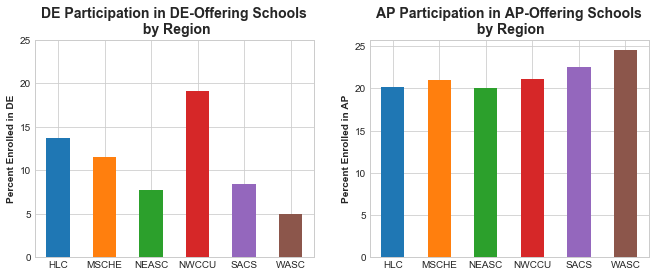

In [102]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (11,4))

plt.sca(ax1)
de_region_with_flag_pct.plot.bar(x='region_accred', y='DE Participation %', ax=ax1)
plt.title('DE Participation in DE-Offering Schools\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,30,5))
plt.xlabel('')
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_region_with_flag_pct.plot.bar(x='region_accred', y='AP Participation %', ax=ax2)
plt.title('AP Participation in AP-Offering Schools\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,26,5))
plt.xlabel('')
plt.ylabel('Percent Enrolled in AP')
plt.show()

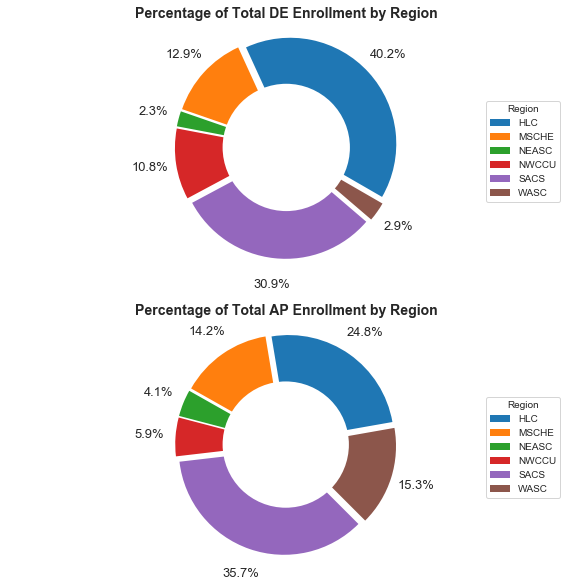

In [103]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = de_region.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(len(de_region))],
                        startangle = -30, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = de_region.region_accred,
           bbox_to_anchor = (1,0.71), title = 'Region',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by Region')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = ap_region.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(len(ap_region))],
                        startangle = 10, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = ap_region.region_accred,
           bbox_to_anchor = (1,0.71), title = 'Region',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by Region')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

# VIII. By Ethnicity Percentage of School (Quintiles)

**DE**

In [104]:
deOffering_eth_total = crdc_1516_deYes.groupby('eth_quintile')['hs_total_enrollment'].sum().reset_index()
de_eth_enrollment = crdc_1516_deYes.groupby('eth_quintile')['de_total_enrollment'].sum().reset_index()
de_eth = de_eth_enrollment.merge(deOffering_eth_total, how = 'inner', on = 'eth_quintile')

In [105]:
de_eth['de_pct_enrolled'] = round(de_eth['de_total_enrollment'] / de_eth['hs_total_enrollment'] * 100, 1)
%store -r hs_by_eth_quin
de_eth_with_flag_pct = de_eth.merge(hs_by_eth_quin, on = 'eth_quintile')

de_eth_with_flag_pct['pct_de'] = de_eth_with_flag_pct['pct_de'] * 100
de_eth_with_flag_pct = de_eth_with_flag_pct.set_index('eth_quintile').rename({1:'0-20%',
                                                                              2:'21-40%',
                                                                              3:'41-60%',
                                                                              4:'61-80%',
                                                                              5:'81-100%'}).reset_index()

de_eth_with_flag_pct = de_eth_with_flag_pct[['eth_quintile', 'de_pct_enrolled', 'pct_de']]
de_eth_with_flag_pct = de_eth_with_flag_pct.rename({'de_pct_enrolled':'DE Participation %',
                                                    'pct_de': '% of Schools in Eth Group Offering DE'}, axis=1)

**AP**

In [106]:
apOffering_eth_total = crdc_1516_apYes.groupby('eth_quintile')['hs_total_enrollment'].sum().reset_index()
ap_eth_enrollment = crdc_1516_apYes.groupby('eth_quintile')['ap_total_enrollment'].sum().reset_index()
ap_eth = ap_eth_enrollment.merge(apOffering_eth_total, how = 'inner', on = 'eth_quintile')

In [107]:
ap_eth['ap_pct_enrolled'] = round(ap_eth['ap_total_enrollment'] / ap_eth['hs_total_enrollment'] * 100, 1)
%store -r ap_by_eth_quin
ap_eth_with_flag_pct = ap_eth.merge(ap_by_eth_quin, on = 'eth_quintile')

ap_eth_with_flag_pct['pct_ap'] = ap_eth_with_flag_pct['pct_ap'] * 100
ap_eth_with_flag_pct = ap_eth_with_flag_pct.set_index('eth_quintile').rename({1:'0-20%',
                                                                              2:'21-40%',
                                                                              3:'41-60%',
                                                                              4:'61-80%',
                                                                              5:'81-100%'}).reset_index()

ap_eth_with_flag_pct = ap_eth_with_flag_pct[['eth_quintile', 'ap_pct_enrolled', 'pct_ap']]
ap_eth_with_flag_pct = ap_eth_with_flag_pct.rename({'ap_pct_enrolled':'AP Participation %',
                                                    'pct_ap': '% of Schools in Eth Group Offering AP'}, axis=1)

**Visualizations**

In [108]:
display(de_eth_with_flag_pct.merge(ap_eth_with_flag_pct, on = 'eth_quintile'))
print('Reads like: ' + str(de_eth_with_flag_pct.at[0, 'DE Participation %'])
   + '% of all high school students in high schools with ' + str(de_eth_with_flag_pct.at[0, 'eth_quintile']) 
   + ' non-white students (and that offer DE) are enrolled in DE Courses, and '
   + str(de_eth_with_flag_pct.at[0, '% of Schools in Eth Group Offering DE']) + '% of the high schools in that Eth Group'
   + ' Offer DE.' + ' ------------ (Same Pattern for AP)')

,eth_quintile,DE Participation %,% of Schools in Eth Group Offering DE,AP Participation %,% of Schools in Eth Group Offering AP
0,0-20%,14.3,80.0,19.2,62.0
1,21-40%,11.8,77.0,23.7,71.0
2,41-60%,9.3,73.0,24.3,76.0
3,61-80%,9.4,65.0,22.8,75.0
4,81-100%,7.5,53.0,19.7,71.0


Reads like: 14.3% of all high school students in high schools with 0-20% non-white students (and that offer DE) are enrolled in DE Courses, and 80.0% of the high schools in that Eth Group Offer DE. ------------ (Same Pattern for AP)


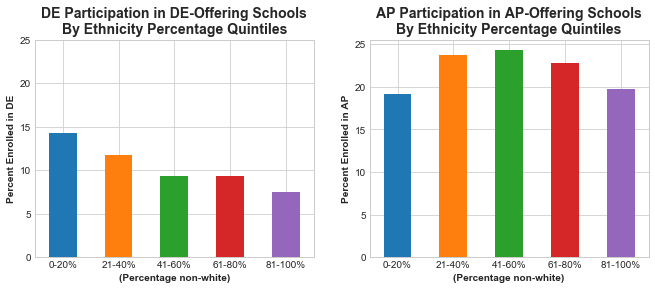

In [109]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (11,4))

plt.sca(ax1)
de_eth.plot.bar(x='eth_quintile', y='de_pct_enrolled', ax = ax1)
plt.legend([])
plt.title('DE Participation in DE-Offering Schools\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.yticks(np.arange(0,30,5))
plt.xlabel('(Percentage non-white)')
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_eth.plot.bar(x='eth_quintile', y='ap_pct_enrolled', ax=ax2)
plt.legend([])
plt.title('AP Participation in AP-Offering Schools\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.xticks([0,1,2,3,4], ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])
plt.yticks(np.arange(0,30,5))
plt.xlabel('(Percentage non-white)')
plt.ylabel('Percent Enrolled in AP')
plt.show()

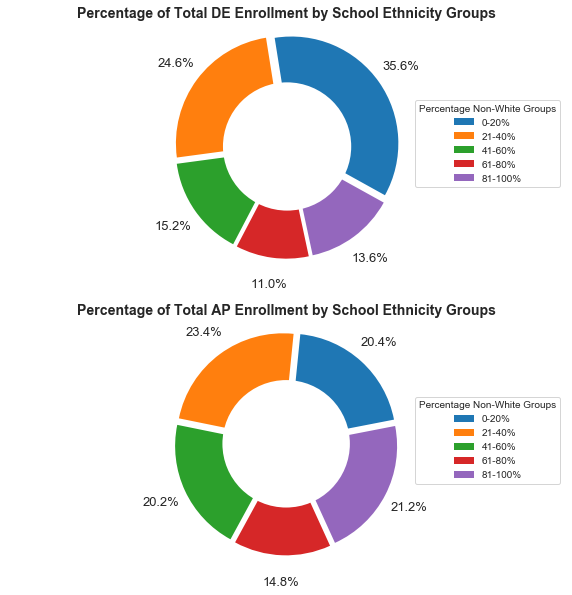

In [110]:
f, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

plt.sca(ax1)
a1 = de_eth.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(5)],
                        startangle = -29, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Ethnicity Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = ap_eth.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%', explode = [.05 for i in range(5)],
                        startangle = 11, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'],
           bbox_to_anchor = (1,0.71), title = 'Percentage Non-White Groups',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Ethnicity Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()

# IX. By Size

**DE**

In [111]:
deOffering_size_total = crdc_1516_deYes.groupby('size_group')['hs_total_enrollment'].sum().reset_index()
de_size_enrollment = crdc_1516_deYes.groupby('size_group')['de_total_enrollment'].sum().reset_index()
de_size = de_size_enrollment.merge(deOffering_size_total, how = 'inner', on = 'size_group')

In [112]:
de_size['de_pct_enrolled'] = round(de_size['de_total_enrollment'] / de_size['hs_total_enrollment'] * 100, 1)
%store -r hs_by_size
de_size_with_flag_pct = de_size.merge(hs_by_size, on = 'size_group')

de_size_with_flag_pct['pct_de'] = de_size_with_flag_pct['pct_de'] * 100
de_size_with_flag_pct = de_size_with_flag_pct[['size_group', 'de_pct_enrolled', 'pct_de']]
de_size_with_flag_pct = de_size_with_flag_pct.rename({'de_pct_enrolled': "DE Participation %",
                               'pct_de': '% of Schools in Size Group Offering DE',
                                'size_group': 'size_group (number of students)'}, axis = 1)

de_size_with_flag_pct = de_size_with_flag_pct.set_index("size_group (number of students)").rename({1: '<100',
                                                                              2: '100-499',
                                                                              3:'500-1199',
                                                                              4:'1200+'}).reset_index()

**AP**

In [113]:
apOffering_size_total = crdc_1516_apYes.groupby('size_group')['hs_total_enrollment'].sum().reset_index()
ap_size_enrollment = crdc_1516_apYes.groupby('size_group')['ap_total_enrollment'].sum().reset_index()
ap_size = ap_size_enrollment.merge(apOffering_size_total, how = 'inner', on = 'size_group')

In [114]:
ap_size['ap_pct_enrolled'] = round(ap_size['ap_total_enrollment'] / ap_size['hs_total_enrollment'] * 100, 1)
%store -r ap_by_size
ap_size_with_flag_pct = ap_size.merge(ap_by_size, on = 'size_group')

ap_size_with_flag_pct['pct_ap'] = ap_size_with_flag_pct['pct_ap'] * 100
ap_size_with_flag_pct = ap_size_with_flag_pct[['size_group', 'ap_pct_enrolled', 'pct_ap']]
ap_size_with_flag_pct = ap_size_with_flag_pct.rename({'ap_pct_enrolled': "AP Participation %",
                               'pct_ap': '% of Schools in Size Group Offering AP',
                                'size_group': 'size_group (number of students)'}, axis = 1)

ap_size_with_flag_pct = ap_size_with_flag_pct.set_index("size_group (number of students)").rename({1: '<100',
                                                                              2: '100-499',
                                                                              3:'500-1199',
                                                                              4:'1200+'}).reset_index()

**Visualizations**

In [115]:
display(de_size_with_flag_pct.merge(ap_size_with_flag_pct, on = 'size_group (number of students)'))
print('Reads like: ' + str(de_size_with_flag_pct.at[0, 'DE Participation %'])
   + '% of all high school students in high schools with ' + str(de_size_with_flag_pct.at[0, 'size_group (number of students)']) 
   + ' students (and that offer DE) are enrolled in DE Courses, and '
   + str(de_size_with_flag_pct.at[0, '% of Schools in Size Group Offering DE']) + '% of the high schools in that Size Group'
   + ' Offer DE.' + ' ------------ (Same Pattern for AP)')

,size_group (number of students),DE Participation %,% of Schools in Size Group Offering DE,AP Participation %,% of Schools in Size Group Offering AP
0,<100,19.6,48.0,15.3,12.0
1,100-499,18.0,71.0,15.5,49.0
2,500-1199,11.9,74.0,18.4,85.0
3,1200+,9.0,76.0,23.9,97.0


Reads like: 19.6% of all high school students in high schools with <100 students (and that offer DE) are enrolled in DE Courses, and 48.0% of the high schools in that Size Group Offer DE. ------------ (Same Pattern for AP)


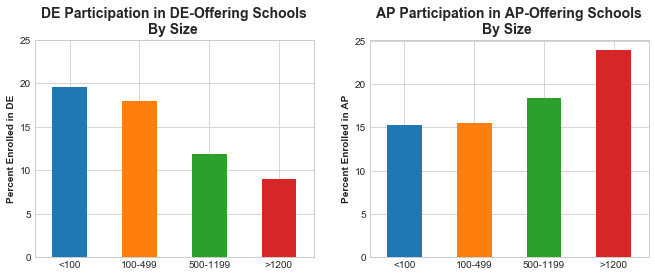

In [116]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11,4))

plt.sca(ax1)
de_size.plot.bar(x = 'size_group', y = 'de_pct_enrolled', ax=ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('DE Participation in DE-Offering Schools\nBy Size ')
plt.yticks(np.arange(0,30,5))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylabel('Percent Enrolled in DE')

plt.sca(ax2)
ap_size.plot.bar(x = 'size_group', y = 'ap_pct_enrolled', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('AP Participation in AP-Offering Schools\nBy Size ')
plt.yticks(np.arange(0,30,5))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylabel('Percent Enrolled in AP')
plt.show()

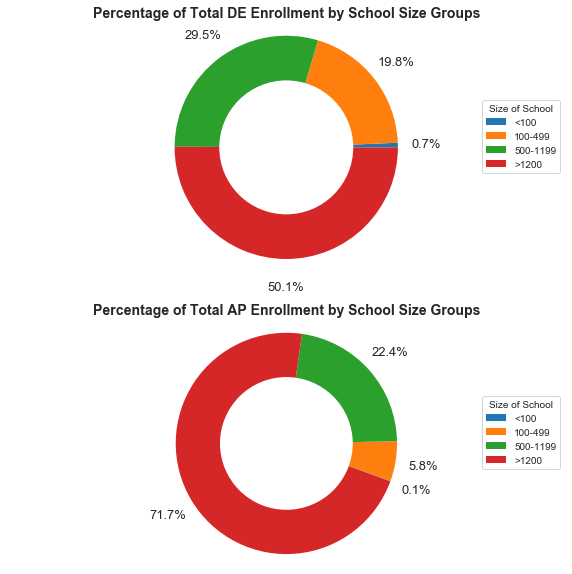

In [117]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10))

plt.sca(ax1)
a1 = de_size.plot.pie(y = 'de_total_enrollment',
                        autopct='%1.1f%%', 
                        startangle = 0, pctdistance=1.25, labels = None, fontsize = 13, ax=ax1)
plt.legend(labels = ['<100', '100-499', '500-1199', '>1200'], bbox_to_anchor = (1,0.71), title = 'Size of School',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total DE Enrollment by School Size Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a1.add_artist(centre_circle)
a1.axis('equal')

plt.sca(ax2)
a2 = ap_size.plot.pie(y = 'ap_total_enrollment',
                        autopct='%1.1f%%',
                        startangle = -20, pctdistance=1.25, labels = None, fontsize = 13, ax=ax2)
plt.legend(labels = ['<100', '100-499', '500-1199', '>1200'], bbox_to_anchor = (1,0.71), title = 'Size of School',
          frameon=True)
plt.ylabel('')
plt.title('Percentage of Total AP Enrollment by School Size Groups')
centre_circle = plt.Circle((0,0),0.6,fc='white')
a2.add_artist(centre_circle)
a2.axis('equal')
plt.show()